# UC San Diego: Data Science in Practice - Final Report
### Summer Session I 2023 | Instructor : C. Alex Simpkins Ph.D.

## UCSD Grade Inflation

# Overview


This research project explores how UCSD students' GPAs changed in upper and lower division courses from 2007 to 2022. We examine the impact of the COVID-19 pandemic, the 2022 UCSD Academic Worker Strike, and the emergence of ChatGPT on these changes. Our analysis suggests a strong correlation between GPA increase and these three factors. The pandemic's disruptions, the influence of ChatGPT, and the strike's effects may have contributed to notable GPA fluctuations during the study period.

# Names

- Emi Lee
- Cindy Luu
- Erwin Miguel Olimpo
- Neda Emdad
- Calvin Nguyen
- Diya Lakhani

<a id='research_question'></a>
# Research Question

How have UCSD students' grade point averages (GPAs) change across various upper division and lower division courses between the years 2007-2022? What factors have influenced these changes, considering the effects of:

* (1) the recent COVID-19 pandemic on student GPAs
* (2) the 2022 UCSD Academic Worker Strike on student GPAs
* (3) the emergence of ChatGPT


# Background and Prior Work


  Between the years 2000 and 2022, the academic landscape at the University of California, San Diego (UCSD), underwent significant transformations, which could have had considerable effects on student grade point averages (GPAs). As educational institutions increasingly grapple with the issue of grade inflation, understanding the trends in UCSD student GPAs during this period becomes crucial. Grade inflation, characterized by an upward trend in average grades over time, has been a concern for educators and policymakers as it may impact the credibility of academic achievements. Thus, investigating the extent of grade inflation at UCSD, its causes, and its potential implications on student performance will provide valuable insights into the university's academic standards and policies.

  Additionally, the research question delves into the influence of external factors that may have contributed to changes in student GPAs at UCSD. The outbreak of the COVID-19 pandemic in 2020 brought unprecedented disruptions to higher education, with universities finding that "students improved their grades during COVID-19 due the use of online systems" [^Clark et al.2021] which indicates "a decline in performance...because of a drop in class attendance and student motivation" [^Borgaonkar et al.2021]. Exploring how the pandemic affected student GPAs comparatively to pre-pandemic years will help assess the pandemic's academic toll and inform strategies for addressing learning challenges during crises. Furthermore, the 2022 UCSD Academic Worker Strike had a significant impact on campus life, affecting both teaching and support services since "grades have been delayed" [^Lozano2022]. Understanding its potential effects on student GPAs will offer insights into the broader implications of labor movements in academia. Lastly, the research question also considers the emergence of ChatGPT, an advanced language model, and its potential impact on student GPAs. As AI technologies increasingly become integrated into education, leaving "many teachers spending more time checking for AI plagiarism and revamping lesson plans to be AI-proof"[^Blose2023], exploring its influence on academic performance relative to the period before its adoption can shed light on the role of such tools in the learning process.
  

References: 

- [^Clark et al.2021]: Clark A.E., Nong H., Zhu H., Zhu R. Compensating for academic loss: Online learning and student performance during the COVID-19 pandemic. China Economic Review. 2021;68 doi: 10.1016/j.chieco.2021.101629. (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9760097/)
- [^Borgaonkar et al.2021]: Borgaonkar A.D., Sodhi J., Vijayabalan R., Nair A.S.K.A. 2021 ASEE virtual annual conference content access. 2021. Comparative study of the impact of COVID-19 pandemic on student participation and performance in first-year engineering courses. (https://doi.org/10.18260%2F1-2--36566)
- [^Lozano2022]: Alicia Victoria Lozano. Canceled lectures, no grades: University of California students face chaotic finals as academic workers strike. NBC U.S. News. (https://www.nbcnews.com/news/us-news/canceled-lectures-no-grades-university-california-students-face-chaoti-rcna60854)
- [^Blose2023]: Abreanna Blose. As ChatGPT Enters the Classroom, Teachers Weigh Pros and Cons. National Education Association News. (https://www.nea.org/advocating-for-change/new-from-nea/chatgpt-enters-classroom-teachers-weigh-pros-and-cons)


# Hypothesis


Research Hypothesis:

UCSD students' GPAs have experienced statistically significant grade inflation from the years 2000 to 2022, leading to a positive boost in student GPAs due to the impacts of specific factors including the recent COVID-19 pandemic, the 2022 UCSD Academic Worker Strike, and the emergence of ChatGPT compared to their respective pre-event periods.


Null Hypothesis:

There has been no statistically significant grade inflation or deflation in UCSD GPA between 2000 and 2022 due to the above factors.


# Dataset(s)


- Dataset Name: UCSD CAPEs Data
- Link to the dataset: https://www.kaggle.com/datasets/sanbornpnguyen/ucsdcapes?utm_medium=social&utm_campaign=kaggle-dataset-share
- Number of observations: 63363 rows

The UCSD CAPEs Data is our primary dataset and it contains all the CAPE evaluations from 2007 to 2023 scraped from the CAPEs website  https://capes.ucsd.edu. The dataset contains information about instructors, recommendation rates, average grade recieved, etc. We plan on extracting columns that detail the course name, average grade recieved, and the quarter.

- Dataset / Website Name: Subject Codes
- Link to the website: https://blink.ucsd.edu/instructors/courses/schedule-of-classes/subject-codes.html
- Number of observations: 210 subject codes

The website above contains subject codes matched with the department names. Since the CAPEs dataset does not contain department and course names, we plan on webscraping the course names to understand the subject codes.



# Data Wrangling

The first step is to import the appropriate modules and convert the data from the CSV file to a dataframe.

In [2]:
#importing relevant data libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import plotly.express as px

#converting data from csv file to pandas dataframe
capes = pd.read_csv('raw_data/capes_data.csv')

In [3]:
#defaults for plots
plt.rcParams["figure.figsize"] = (20, 8)

In [4]:
capes.head()

,Instructor,Course,Quarter,Total Enrolled in Course,Total CAPEs Given,Percentage Recommended Class,Percentage Recommended Professor,Study Hours per Week,Average Grade Expected,Average Grade Received,Evalulation URL
0,Butler Elizabeth Annette,AAS 10 - Intro/African-American Studies (A),SP23,66,48,93.5%,100.0%,2.80,A- (3.84),B+ (3.67),https://cape.ucsd.edu/CAPEReport.aspx?sectioni...
1,Butler Elizabeth Annette,AAS 170 - Legacies of Research (A),SP23,20,7,100.0%,100.0%,2.50,A- (3.86),A- (3.92),https://cape.ucsd.edu/CAPEReport.aspx?sectioni...
2,Jones Ian William Nasser,ANAR 111 - Foundations of Archaeology (A),SP23,16,3,100.0%,100.0%,3.83,B+ (3.67),NaN,https://cape.ucsd.edu/CAPEReport.aspx?sectioni...
3,Shtienberg Gilad,ANAR 115 - Coastal Geomorphology/Environ (A),SP23,26,6,100.0%,83.3%,3.83,B+ (3.50),B (3.07),https://cape.ucsd.edu/CAPEReport.aspx?sectioni...
4,Braswell Geoffrey E.,ANAR 155 - Stdy Abrd: Ancient Mesoamerica (A),SP23,22,9,100.0%,100.0%,5.17,A (4.00),A (4.00),https://cape.ucsd.edu/CAPEReport.aspx?sectioni...


### Webscraping to create a data of subject dept code to department

In [5]:
html = requests.get(url="https://blink.ucsd.edu/instructors/courses/schedule-of-classes/subject-codes.html").content
soup = BeautifulSoup(html)

In [6]:
lst_dept_codes = [tag.text for tag in soup.find_all("td")]
#truncating output since the list is quite lengthy
lst_dept_codes[0:10]

['AAPI',
 'Asian American and Pacific Islander Studies',
 'AAS',
 'African American Studies',
 'AESE',
 'Architecture Based Enterprise Systems Engineering',
 'AIP',
 'Academic Internship Program',
 'ANAR',
 'Anthropological Archaeology']

In [9]:
dict_code_to_dept = {}
for i in (range(len(lst_dept_codes)//2)):
    code = lst_dept_codes[2*i]
    dept = lst_dept_codes[2*i+1].replace('\xa0', ' ').replace('/','')
    dict_code_to_dept[code] = dept

#viewing the first 5 elements
list(dict_code_to_dept.items())[0:5]

[('AAPI', 'Asian American and Pacific Islander Studies'),
 ('AAS', 'African American Studies'),
 ('AESE', 'Architecture Based Enterprise Systems Engineering'),
 ('AIP', 'Academic Internship Program'),
 ('ANAR', 'Anthropological Archaeology')]

In [10]:
dict_code_to_dept["ELWR"]="Entry Level Writing Requirement"
dict_code_to_dept["JUDA"]="Jewish Studies"
dict_code_to_dept["FPMU"]="Family Medicine and Public Health"


There does not seem to be further data wrangling work required. We can shift to data clening. 

# Data Cleaning

Let's begin with checking the dimensions of our data set and the column names.

In [9]:
#returns dimensions of the dataframe
capes.shape

(63363, 11)

In [10]:
#returns column names
capes.columns

Index(['Instructor', 'Course', 'Quarter', 'Total Enrolled in Course',
       'Total CAPEs Given', 'Percentage Recommended Class',
       'Percentage Recommended Professor', 'Study Hours per Week',
       'Average Grade Expected', 'Average Grade Received', 'Evalulation URL'],
      dtype='object')

Our research question is focused on studying the changes in the GPA over various courses between the years 2007-2023. Columns detailing information about the instructor, recommendation rate, study hours, expected grades, evaluation URL, and total CAPEs given can be dropped from our dataset.

In [11]:
#dropping unecessary columns
capes = capes.drop(columns = ['Instructor', 'Percentage Recommended Class',
       'Percentage Recommended Professor', 'Study Hours per Week',
       'Average Grade Expected', 'Evalulation URL', 'Total Enrolled in Course',
       'Total CAPEs Given'])
capes.head()

,Course,Quarter,Average Grade Received
0,AAS 10 - Intro/African-American Studies (A),SP23,B+ (3.67)
1,AAS 170 - Legacies of Research (A),SP23,A- (3.92)
2,ANAR 111 - Foundations of Archaeology (A),SP23,NaN
3,ANAR 115 - Coastal Geomorphology/Environ (A),SP23,B (3.07)
4,ANAR 155 - Stdy Abrd: Ancient Mesoamerica (A),SP23,A (4.00)


There are some cases in which the professor for a course does not report the average grade received by the class. These entries appear as NaN values and those observations need to be dropped. Although, removing NaN values is a part of data wrangling, since we are only concerned about missing values in three columns it was necessary to strip unrequired columns first.

In [12]:
#checking for NaN values
capes.isnull().sum().any()

True

In [13]:
#dropping NaN rows
capes = capes.dropna()

#verifying that our dataframe is free of any missing values
capes.isnull().sum().any()

False

Grades in the 'Average Grade Recieved' column are of the form <letter_grade (GPA)>. In order to analyze how the GPA is changing overtime and take a mean of all the GPAs, we need to split the column into grade (as a string) and GPA (as a float).

In [14]:
#defining function to split the grade
def split_grade_gpa(string):
    lst1 = string.split("(")
    str1 = lst1[1].strip(")")
    return float(str1)

#helper function to extract grade
def split_grade(string):
    lst1 = string.split("(")
    return lst1[0].strip(" ")

cape_GPAs = capes['Average Grade Received'].apply(split_grade_gpa)
cape_grades = capes['Average Grade Received'].apply(split_grade)

#adding GPA column
capes['GPA'] = cape_GPAs
#adding grade column
capes['Grade'] = cape_grades

capes = capes.drop(columns=['Average Grade Received'])
capes.head()

,Course,Quarter,GPA,Grade
0,AAS 10 - Intro/African-American Studies (A),SP23,3.67,B+
1,AAS 170 - Legacies of Research (A),SP23,3.92,A-
3,ANAR 115 - Coastal Geomorphology/Environ (A),SP23,3.07,B
4,ANAR 155 - Stdy Abrd: Ancient Mesoamerica (A),SP23,4.00,A
5,ANBI 111 - Human Evolution (A),SP23,2.95,B-


Similarly, we require a column for department, whether a course is a lower division course or upper division course, and the year. This is so we can groupby quarter, department, and division taking a mean of the GPAs. Then in analysis we will compare the means of every department lower and upper division across every quarter since FA07.

In [15]:
#function to obtain department code
def dept_strip(string):
    lst1 = string.split(" ")
    return lst1[0]

#function to check for lower division / upper division
def ldud(string):
    lst1 = string.split(" ")
    if lst1[1].isalpha() == False:
        str_num = "".join(filter(lambda x: x.isalpha() == False, lst1[1]))
        if int(str_num) <= 99:
            return "LD"
        else:
            return "UD"
    else:
        if int(lst1[1]) <= 99:
            return "LD"
        else:
            return "UD"
    
dept_names = capes['Course'].apply(dept_strip)
upper_lower = capes['Course'].apply(ldud)

#creating a column for upper / lower division
capes['Division'] = upper_lower
#creating a column for department
capes['Dept'] = dept_names

In [16]:
# helper function to extract year from quarter column
def extract_year(string):
    ret_str = "20" + string[2:4]
    return int(ret_str)

years = capes['Quarter'].apply(extract_year)

#creating year column
capes['Year'] = years
capes.head()

,Course,Quarter,GPA,Grade,Division,Dept,Year
0,AAS 10 - Intro/African-American Studies (A),SP23,3.67,B+,LD,AAS,2023
1,AAS 170 - Legacies of Research (A),SP23,3.92,A-,UD,AAS,2023
3,ANAR 115 - Coastal Geomorphology/Environ (A),SP23,3.07,B,UD,ANAR,2023
4,ANAR 155 - Stdy Abrd: Ancient Mesoamerica (A),SP23,4.00,A,UD,ANAR,2023
5,ANBI 111 - Human Evolution (A),SP23,2.95,B-,UD,ANBI,2023


Let's rearrange the columns in an orderly manner so the quarter is the first column.

In [17]:
#rearranging the columns
capes = capes.get(['Quarter', 'Dept', 'Course', 'Division', 'Year', 'GPA', 'Grade'])
capes.head()

,Quarter,Dept,Course,Division,Year,GPA,Grade
0,SP23,AAS,AAS 10 - Intro/African-American Studies (A),LD,2023,3.67,B+
1,SP23,AAS,AAS 170 - Legacies of Research (A),UD,2023,3.92,A-
3,SP23,ANAR,ANAR 115 - Coastal Geomorphology/Environ (A),UD,2023,3.07,B
4,SP23,ANAR,ANAR 155 - Stdy Abrd: Ancient Mesoamerica (A),UD,2023,4.00,A
5,SP23,ANBI,ANBI 111 - Human Evolution (A),UD,2023,2.95,B-


To compare the means for every department across lower division and upper division courses we need to groupby quarter, department and division. Before that, we are creating a capes_sub df that will not contain the letter grade columns since we cannot obtain a mean of that column.

In [18]:
#Computing the means per course per quater divided by division
capes_sub = capes.get(['Quarter', 'Dept', 'Division', 'Year', 'GPA'])
capes_sub = capes_sub.groupby(['Quarter', 'Dept', 'Division'], sort=False).mean().iloc[::-1].reset_index()
capes_sub = capes_sub[capes_sub['Year'] >= 2013]
capes_sub["Dept Name"] = capes_sub["Dept"].apply(lambda x: dict_code_to_dept[x])
capes_sub.head()


,Quarter,Dept,Division,Year,GPA,Dept Name
2208,WI13,WCWP,LD,2013.0,3.125000,Warren College Writing Program
2209,WI13,VIS,LD,2013.0,3.542000,Visual Arts
2210,WI13,VIS,UD,2013.0,3.444286,Visual Arts
2211,WI13,USP,LD,2013.0,3.390000,Urban Studies and Planning
2212,WI13,USP,UD,2013.0,3.570000,Urban Studies and Planning


In [19]:
capes_sub_wo_sum = capes_sub[~((capes_sub['Quarter'].str.contains("S1")) | (capes_sub['Quarter'].str.contains("S2")) | capes_sub['Quarter'].str.contains("S3"))]

For analysis we will begin with line plots to visualize the increase in GPA across the quarters and proceed with an ANOVA test to compare group means for our three subquestions.

# Data Analysis & Results (EDA)

In order to understand how UCSD students' average GPAs have changed due to the multiple variables we have defined (the COVID-19 pandemic, the 2022 Academic Worker Strike, and the emergence of ChatGPT), it is essential that we visualize our data in multiple different plots. This way, we can examine any increases, decreases, or other interesting behavior in our data and attempt to attribute it's existence to a source in order to supplement and support our research. 

### Overall GPA Avg by Quarter

First, we began with creating a table with just the quarter, year, and GPA columns of our data frame.

In [21]:
capes_by_qtr = capes_sub.get(['Quarter', 'Year', 'GPA']).groupby("Quarter", sort=False).mean().reset_index()
capes_by_qtr

,Quarter,Year,GPA
0,WI13,2013.0,3.313521
1,SP13,2013.0,3.309703
2,S113,2013.0,3.205300
3,S213,2013.0,3.198214
4,S313,2013.0,3.728000
...,...,...,...
56,S222,2022.0,3.430904
57,S322,2022.0,3.535500
58,FA22,2022.0,3.504815
59,WI23,2023.0,3.493449


We used this data to plot the average GPA per quarter, including summer sessions. It is important to note that when plotting our data, we noticed that students' GPAs during summer sessions are significantly higher than non-summer quarters. This is an interesting find, and is something we will explore later.

<Axes: xlabel='Quarter', ylabel='GPA'>

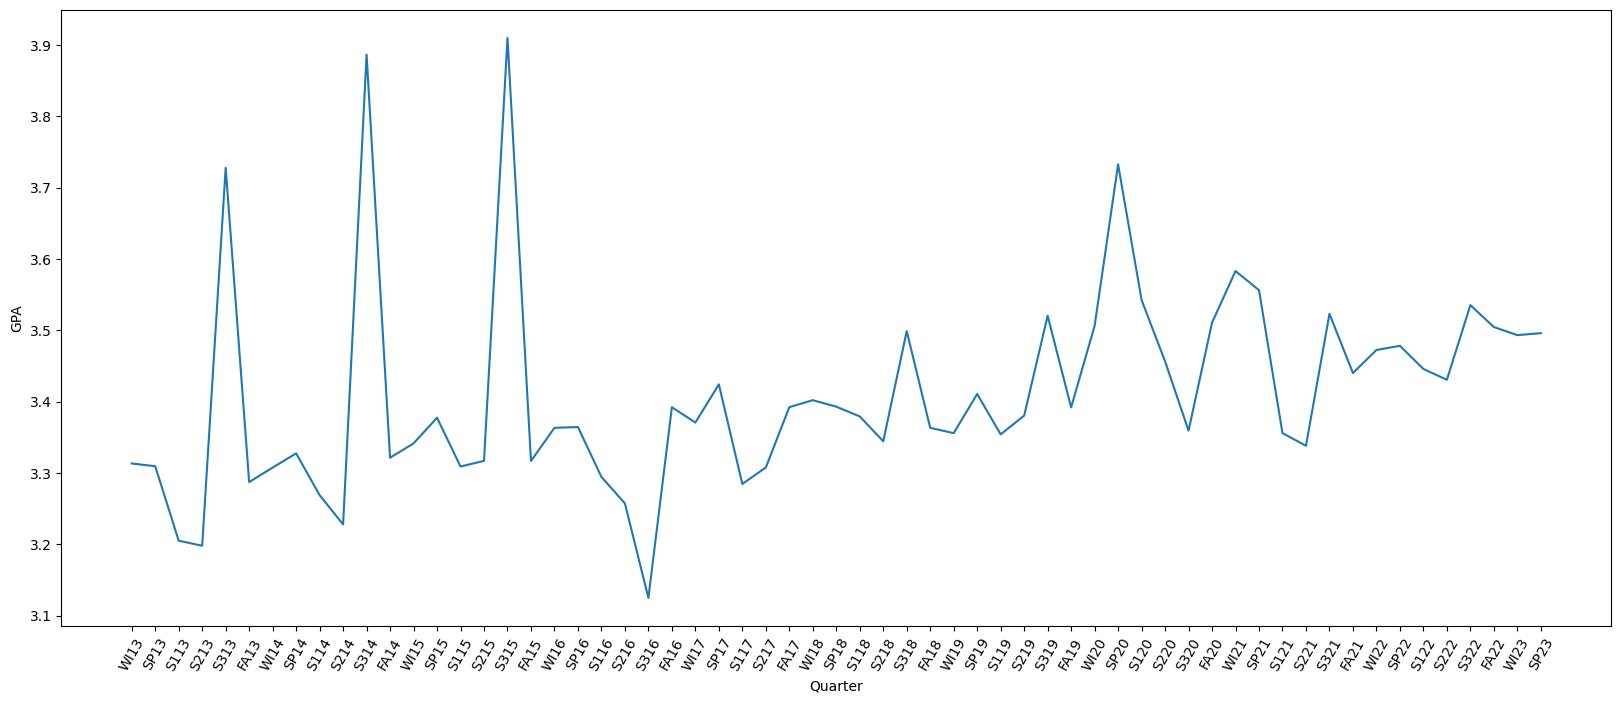

In [22]:
#grouped by quarter to get average GPA per quarter
plt.figure(figsize = (20,8))
plt.xticks(rotation=60)
#lineplot of avg GPA throughout quarters
sns.lineplot(data=capes_by_qtr, x="Quarter", y="GPA")
#summer has huge peaks for some reason so ill show lineplots where one contains summer and the other doesn't

Summer sessions at UCSD saw an increase in average GPAs per course  compared to non-summer quarters. This can be attributed to a multitude of factors - there are less classes taken during the summer compared to during the normal year, which could account for less fluctuations in grades. This said, though many confounding variables contribute to this trend, there is a clear trend in a positive fluctuation of average GPAs per course per summer session in comparison to non-summer quarters. 

Knowing what we know now, we would like to see the same data, but without summer sessions so that we can see any fluctuations in GPA in regular quarters in the year. We thus removed summer sessions from our data, and plotted the same graph as before, with the Quarter on the x-axis and average GPA on the y-axis.

In [23]:
capes_by_qtr_without_sum = capes_by_qtr[~((capes_by_qtr['Quarter'].str.contains("S1")) | (capes_by_qtr['Quarter'].str.contains("S2")) | capes_by_qtr['Quarter'].str.contains("S3"))]
capes_by_qtr_without_sum.head(10)

,Quarter,Year,GPA
0,WI13,2013.0,3.313521
1,SP13,2013.0,3.309703
5,FA13,2013.0,3.287535
6,WI14,2014.0,3.307740
7,SP14,2014.0,3.327724
11,FA14,2014.0,3.321618
12,WI15,2015.0,3.341683
13,SP15,2015.0,3.377655
17,FA15,2015.0,3.317013
18,WI16,2016.0,3.363539


<Axes: xlabel='Quarter', ylabel='GPA'>

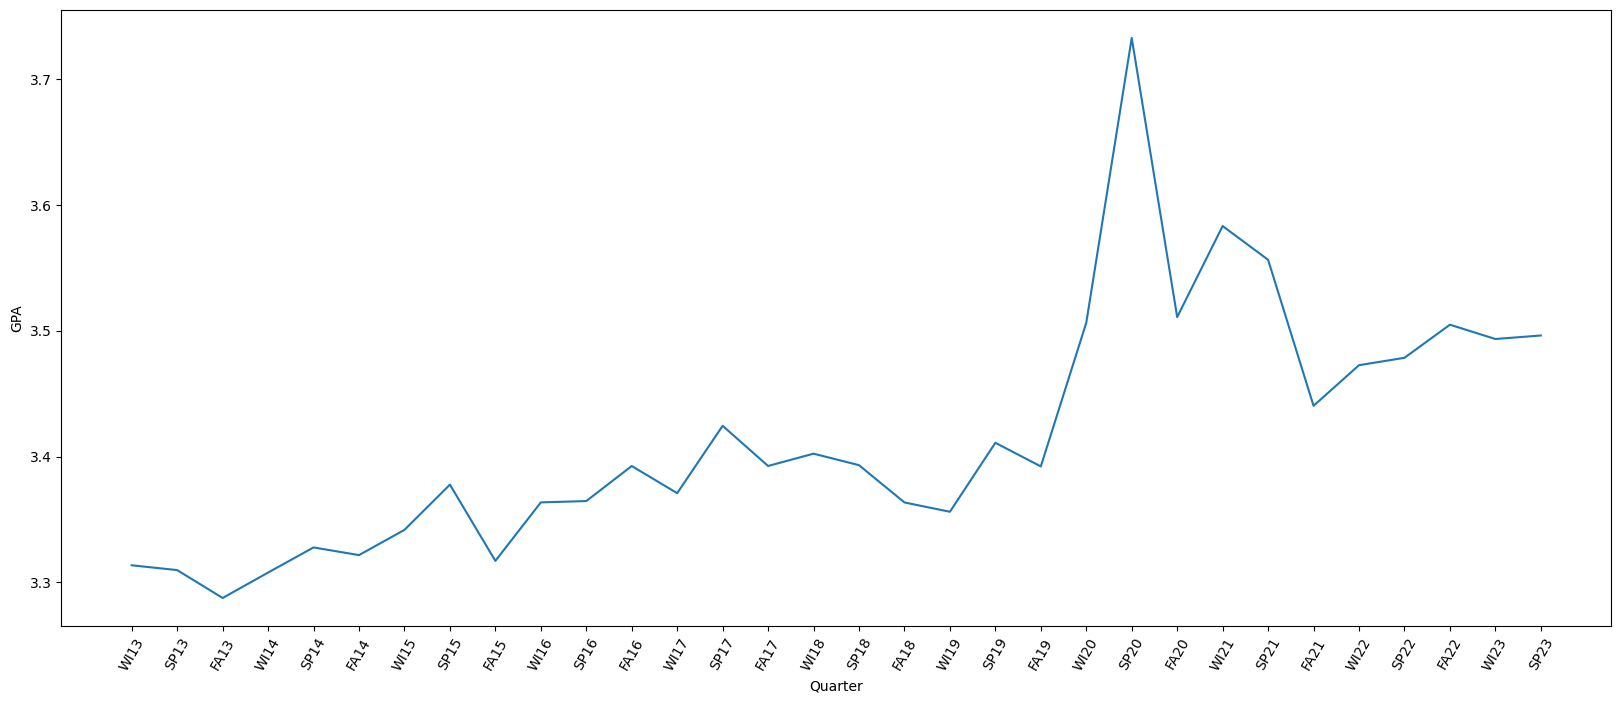

In [24]:
plt.xticks(rotation=60)
sns.lineplot(data=capes_by_qtr_without_sum, x="Quarter", y="GPA")

There is an extremely clear jump in average GPAs for UCSD students in 2020, during and after the Spring 2020 quarter. This is precisely when the COVID-19 pandemic hit, causing the university to enter a remote modality (around mid-March 2020). We can additionally see in our plot that the GPA average remained higher than pre-pandemic averages post SP20.

Now, let's plot this same data (GPA per quarter - excluding summer sessions) in a boxplot.

<Axes: xlabel='Quarter', ylabel='GPA'>

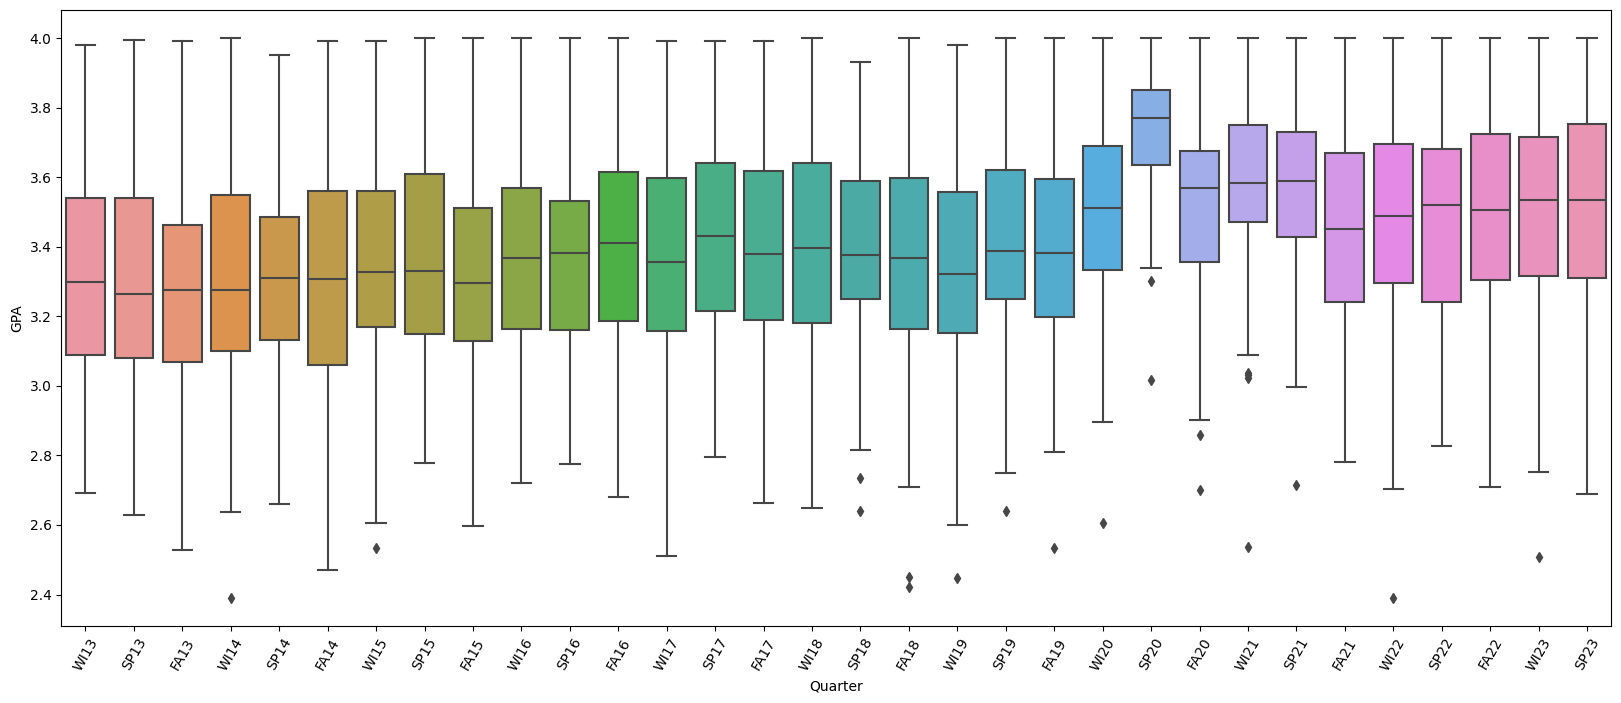

In [25]:
plt.xticks(rotation=60)
sns.boxplot(data=capes_sub_wo_sum, x="Quarter", y="GPA")
#boxplot of quarters

### Lower Divison

In the interest of detail, we additionally would like to visualize our data in terms of lower division classes versus upper division classes, and see if there are discrepencies or similarities in GPA fluctuations between the two class divisions.

First, we begin with a boxplot of the average GPA earned by UCSD students in lower division classes per quarter.

<Axes: xlabel='Quarter', ylabel='GPA'>

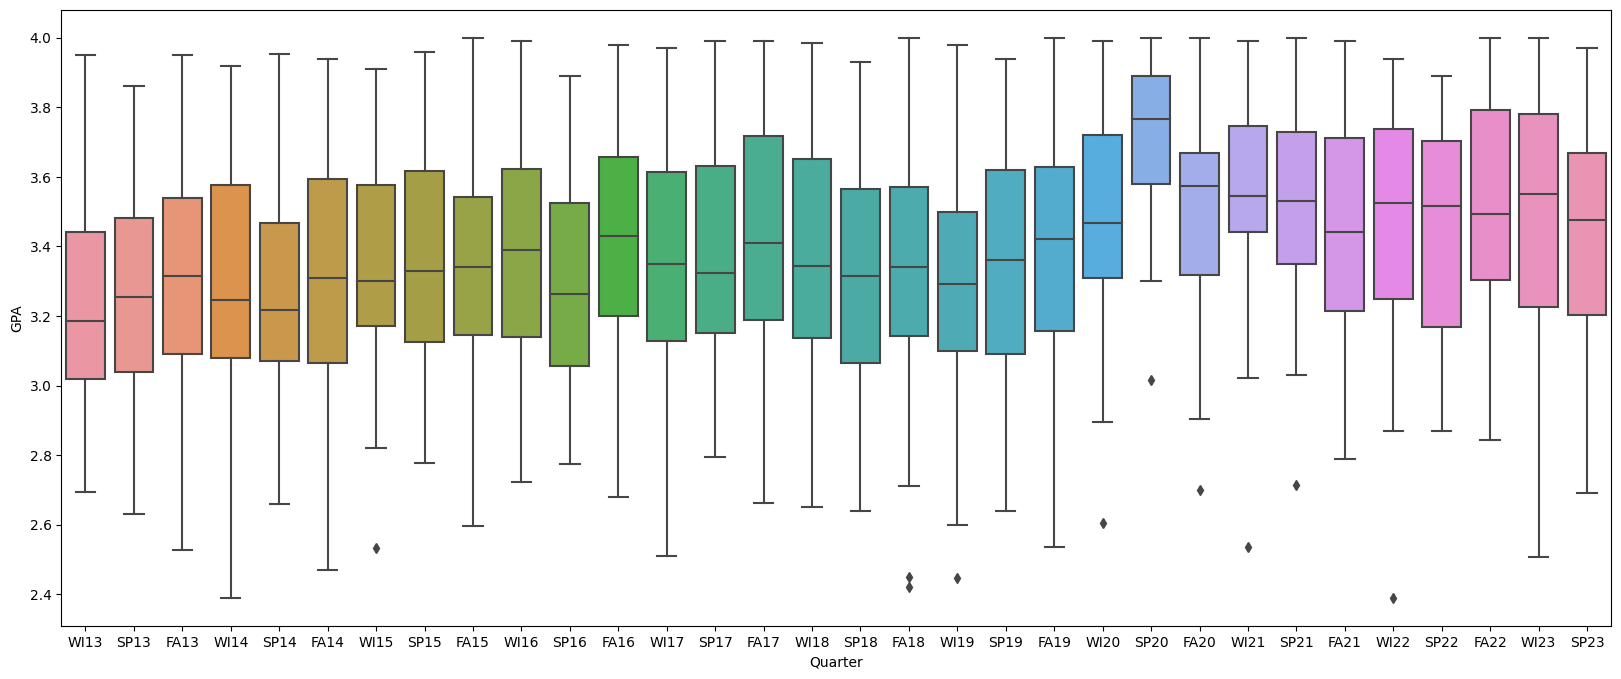

In [26]:
sns.boxplot(data=capes_sub_wo_sum[capes_sub_wo_sum["Division"]=="LD"], x="Quarter", y="GPA")

### Upper Division

Next, we made another boxplot, but this time using data of the average GPA earned by UCSD students in upper division classes per quarter.

<Axes: xlabel='Quarter', ylabel='GPA'>

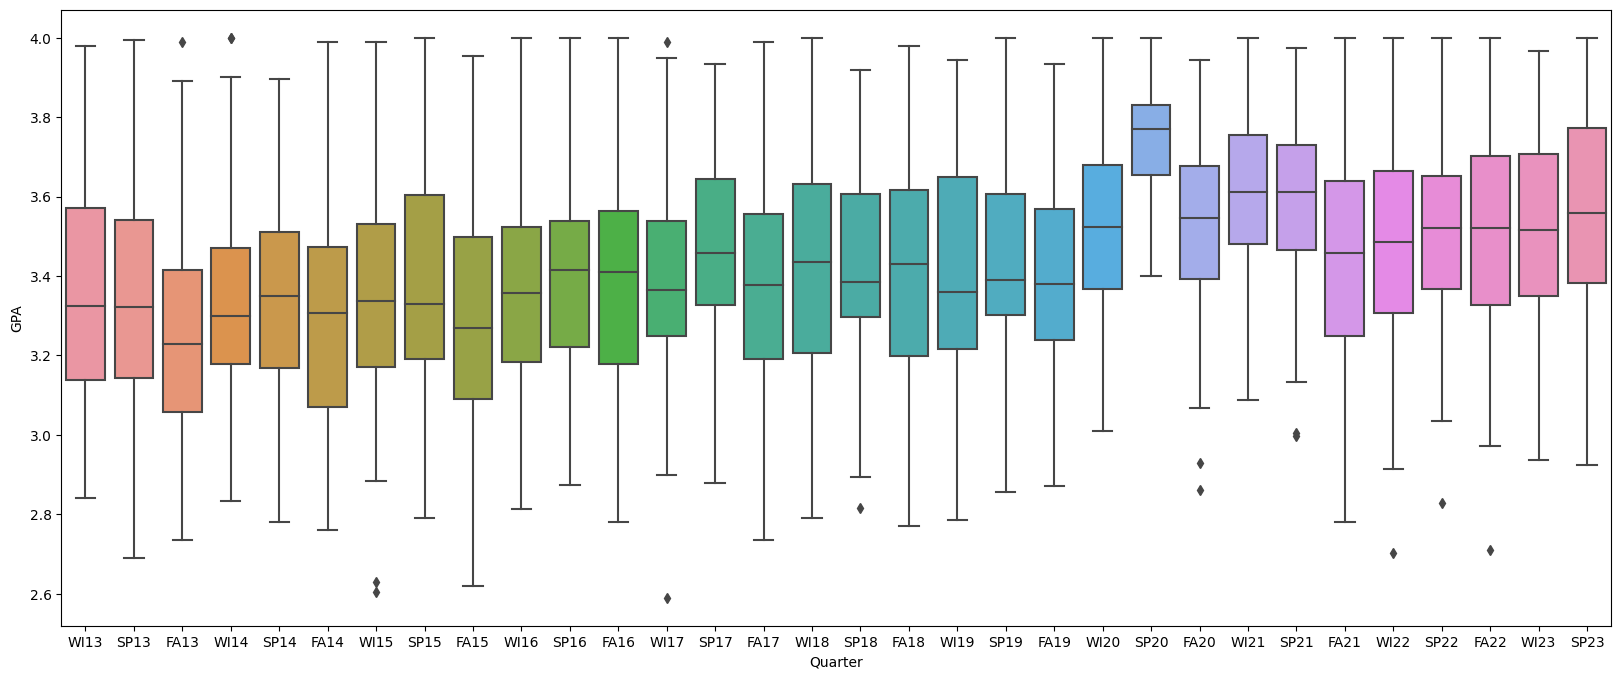

In [27]:
sns.boxplot(data=capes_sub_wo_sum[capes_sub_wo_sum["Division"]=="UD"], x="Quarter", y="GPA")

There appears to be generally less variability distribution in terms of average GPA received in upper division classes compared to lower division classes. Additionally, we can see a jump in average GPA received in both lower division and upper division courses during the “pandemic period” (post the SP20 quarter).


### COVID-19 Pandemic
We will consider everything during and after SP20 as the pandemic period. In order to clearly see whether or not there was a jump in average GPA earned by UCSD students during the pandemic period versus before, we created a box plot of all data post SP20, excluding summer sessions.

In [28]:
capes_sub_wo_sum["during_pandemic"] = (capes_sub["Year"] >=2021)|(capes_sub["Quarter"] == "SP20")|(capes_sub["Quarter"] == "FA20")
capes_sub_wo_sum

C:\Users\lakha\AppData\Local\Temp\ipykernel_43952\3815074080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capes_sub_wo_sum["during_pandemic"] = (capes_sub["Year"] >=2021)|(capes_sub["Quarter"] == "SP20")|(capes_sub["Quarter"] == "FA20")


,Quarter,Dept,Division,Year,GPA,Dept Name,during_pandemic
2208,WI13,WCWP,LD,2013.0,3.125000,Warren College Writing Program,False
2209,WI13,VIS,LD,2013.0,3.542000,Visual Arts,False
2210,WI13,VIS,UD,2013.0,3.444286,Visual Arts,False
2211,WI13,USP,LD,2013.0,3.390000,Urban Studies and Planning,False
2212,WI13,USP,UD,2013.0,3.570000,Urban Studies and Planning,False
...,...,...,...,...,...,...,...
7355,SP23,ANSC,UD,2023.0,3.548889,Anthro Sociocultural Anthropology,True
7356,SP23,ANBI,UD,2023.0,2.996667,Anthropology Biological Anthropology,True
7357,SP23,ANAR,UD,2023.0,3.535000,Anthropological Archaeology,True
7358,SP23,AAS,UD,2023.0,3.920000,African American Studies,True


<Axes: xlabel='during_pandemic', ylabel='GPA'>

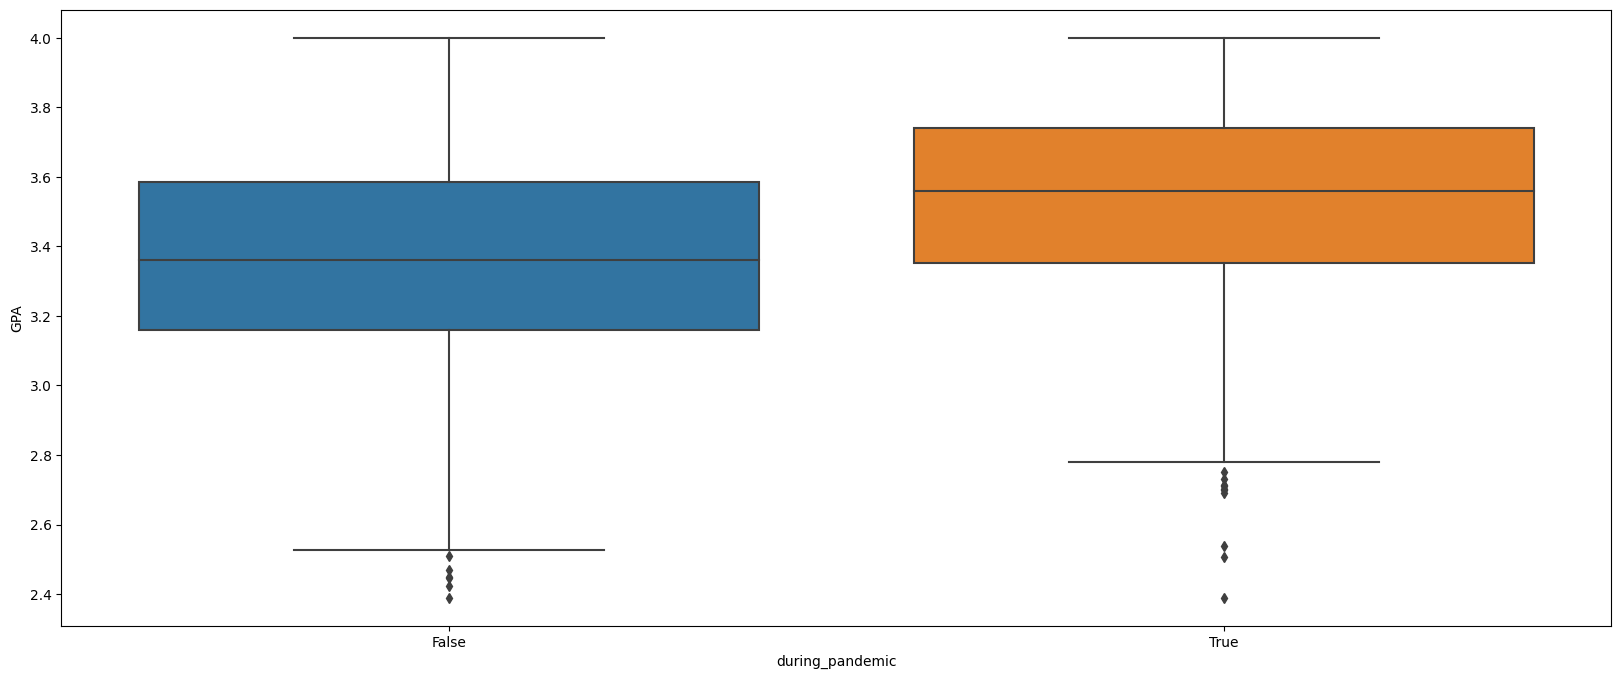

In [29]:
sns.boxplot(data=capes_sub_wo_sum, x="during_pandemic", y="GPA")

It is evident that the average GPA earned by UCSD students during the pandemic period (post SP20 to present day) is higher than before the pandemic period. Outside grade inflation, there are a multitude of different reasons why UCSD students had higher average GPA's during the pandemic than after (such as remote course modality or recorded lectures), but regardless, it is evident that there is a clear increase in overall average GPA on UCSD’s campus.

### Rise of ChatGPT
ChatGPT rose in popularity in late December, so we will consider WI23 Quarter Onwards as ChatGPT time.

In [30]:
capes_sub_wo_sum["during_chatgpt"] = (capes_sub_wo_sum["Year"] >= 2023)
capes_sub_wo_sum

C:\Users\lakha\AppData\Local\Temp\ipykernel_43952\2876471663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capes_sub_wo_sum["during_chatgpt"] = (capes_sub_wo_sum["Year"] >= 2023)


,Quarter,Dept,Division,Year,GPA,Dept Name,during_pandemic,during_chatgpt
2208,WI13,WCWP,LD,2013.0,3.125000,Warren College Writing Program,False,False
2209,WI13,VIS,LD,2013.0,3.542000,Visual Arts,False,False
2210,WI13,VIS,UD,2013.0,3.444286,Visual Arts,False,False
2211,WI13,USP,LD,2013.0,3.390000,Urban Studies and Planning,False,False
2212,WI13,USP,UD,2013.0,3.570000,Urban Studies and Planning,False,False
...,...,...,...,...,...,...,...,...
7355,SP23,ANSC,UD,2023.0,3.548889,Anthro Sociocultural Anthropology,True,True
7356,SP23,ANBI,UD,2023.0,2.996667,Anthropology Biological Anthropology,True,True
7357,SP23,ANAR,UD,2023.0,3.535000,Anthropological Archaeology,True,True
7358,SP23,AAS,UD,2023.0,3.920000,African American Studies,True,True


<Axes: xlabel='during_chatgpt', ylabel='GPA'>

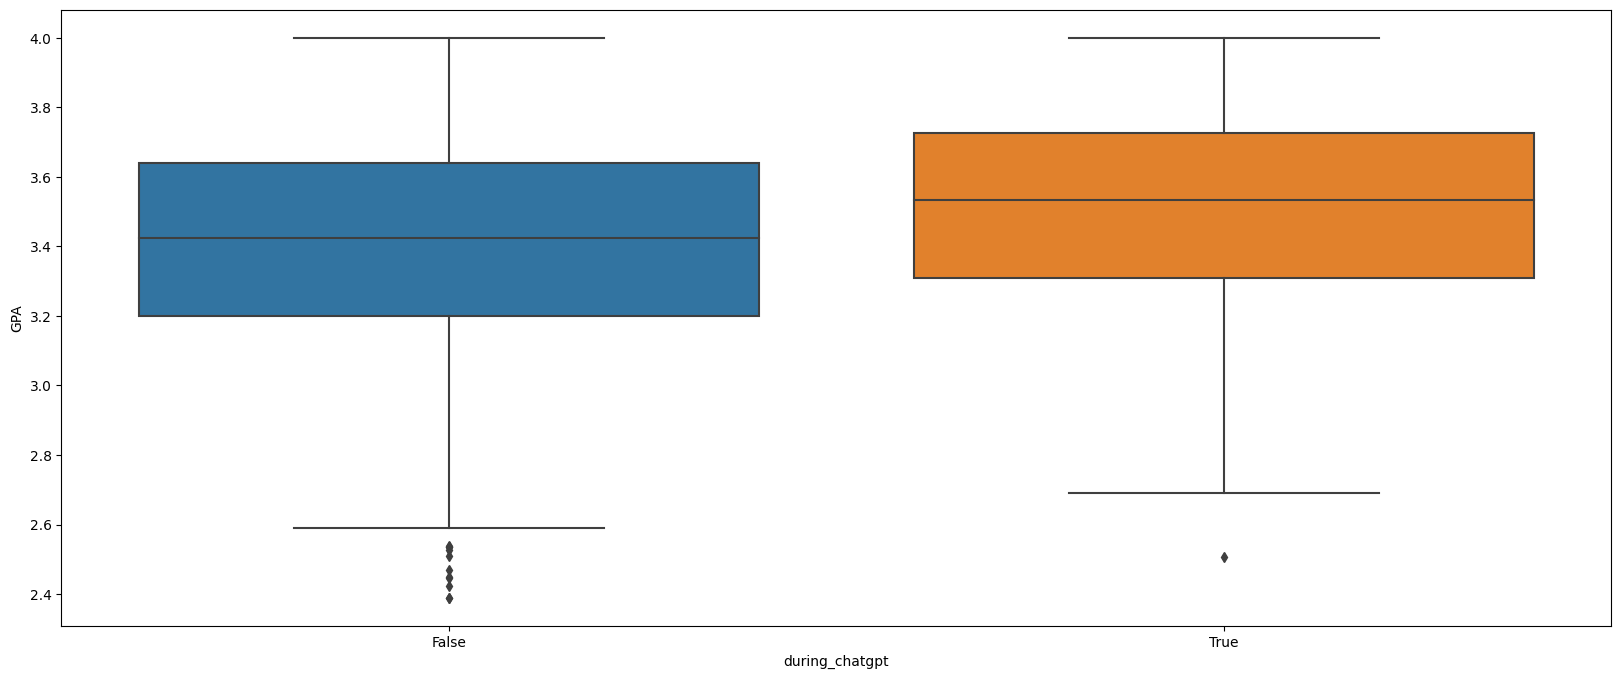

In [31]:
sns.boxplot(data=capes_sub_wo_sum, x="during_chatgpt", y="GPA")

Average GPA earned by UCSD students during WI23 and beyond are indeed higher than the average GPA of a pre-ChatGPT time.

### TA Strike
The TA Strike/Academic Worker Strike only occurred in FA22, so that is the time period we analyzed to see if there were any changes in average GPA during the strike.

In [32]:
capes_sub_wo_sum["during_TA_Strike"] = (capes_sub_wo_sum["Quarter"] == "FA22")
capes_sub_wo_sum


C:\Users\lakha\AppData\Local\Temp\ipykernel_43952\3664347347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capes_sub_wo_sum["during_TA_Strike"] = (capes_sub_wo_sum["Quarter"] == "FA22")


,Quarter,Dept,Division,Year,GPA,Dept Name,during_pandemic,during_chatgpt,during_TA_Strike
2208,WI13,WCWP,LD,2013.0,3.125000,Warren College Writing Program,False,False,False
2209,WI13,VIS,LD,2013.0,3.542000,Visual Arts,False,False,False
2210,WI13,VIS,UD,2013.0,3.444286,Visual Arts,False,False,False
2211,WI13,USP,LD,2013.0,3.390000,Urban Studies and Planning,False,False,False
2212,WI13,USP,UD,2013.0,3.570000,Urban Studies and Planning,False,False,False
...,...,...,...,...,...,...,...,...,...
7355,SP23,ANSC,UD,2023.0,3.548889,Anthro Sociocultural Anthropology,True,True,False
7356,SP23,ANBI,UD,2023.0,2.996667,Anthropology Biological Anthropology,True,True,False
7357,SP23,ANAR,UD,2023.0,3.535000,Anthropological Archaeology,True,True,False
7358,SP23,AAS,UD,2023.0,3.920000,African American Studies,True,True,False


<Axes: xlabel='during_TA_Strike', ylabel='GPA'>

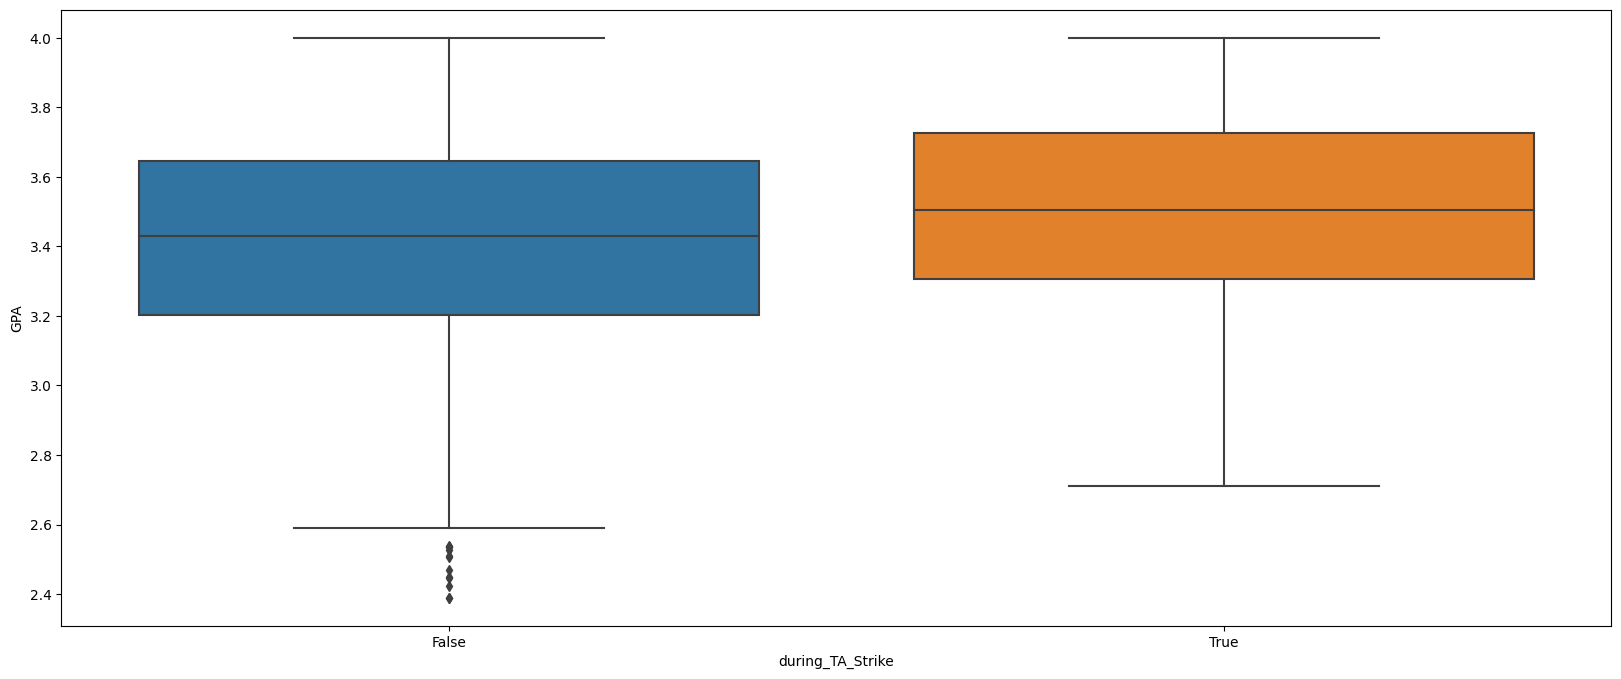

In [33]:
sns.boxplot(data=capes_sub_wo_sum, x="during_TA_Strike", y="GPA")

The average GPA was indeed higher during the TA strike than during times where there was no TA strike. We can attribute this increase to many reasons, including but not limited to switches in exam modality and grading schemes, but nevertheless, it is clear that there was an increase in average GPA across all courses on UCSD's campus.

### By Department

Finally, we wanted to examine GPA earned in different academic departments, in order to obtain a birds-eye view of GPA fluctuations across different departments and whether or not any of our three variables had any effect.

In [34]:
#grouped by quarter and department to get the avg gpa per quarter per department
mean_gpa_by_dept_qtr = capes_sub_wo_sum.groupby(["Quarter", "Dept Name"])[["GPA"]].mean().reset_index()

In [35]:
mean_gpa_by_dept_qtr['Year'] = mean_gpa_by_dept_qtr['Quarter'].apply(extract_year)
mean_gpa_by_dept_qtr = mean_gpa_by_dept_qtr.get(["Year", "Quarter", "Dept Name", "GPA"])
#correcting the order of the quarters
mean_gpa_by_dept_qtr = mean_gpa_by_dept_qtr.sort_values(['Year', 'Quarter'], ascending = [True, False])
mean_gpa_by_dept_qtr.head(5)

,Year,Quarter,Dept Name,GPA
1795,2013,WI13,Anthro Sociocultural Anthropology,3.305000
1796,2013,WI13,Anthropology,3.110000
1797,2013,WI13,Anthropology Biological Anthropology,3.330000
1798,2013,WI13,Bioengineering,3.387333
1799,2013,WI13,Biology Animal Physiology and Neuroscience,3.132500


In [36]:
px.line(mean_gpa_by_dept_qtr, x="Quarter", y="GPA", color="Dept Name", category_orders={"Dept Name": np.sort(mean_gpa_by_dept_qtr["Dept Name"].unique())}
).update_traces(visible="legendonly", selector=lambda t: not t.name in ["Data Science", "Computer Science and Engineering"])
#in this plot you can compare GPA by department by looking through these department names

![Alt text](image.png)

The image above is a screenshot of the interactive plot. We have added a screenshot since the interactive plot does not appear in the jupyter notebook on GitHub.

While the plot above depicts the growth of every course per quarter individually, we can also create a facet lineplot to visualize overall growth in GPA per year for all the departments simultaneously.

c:\Users\lakha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



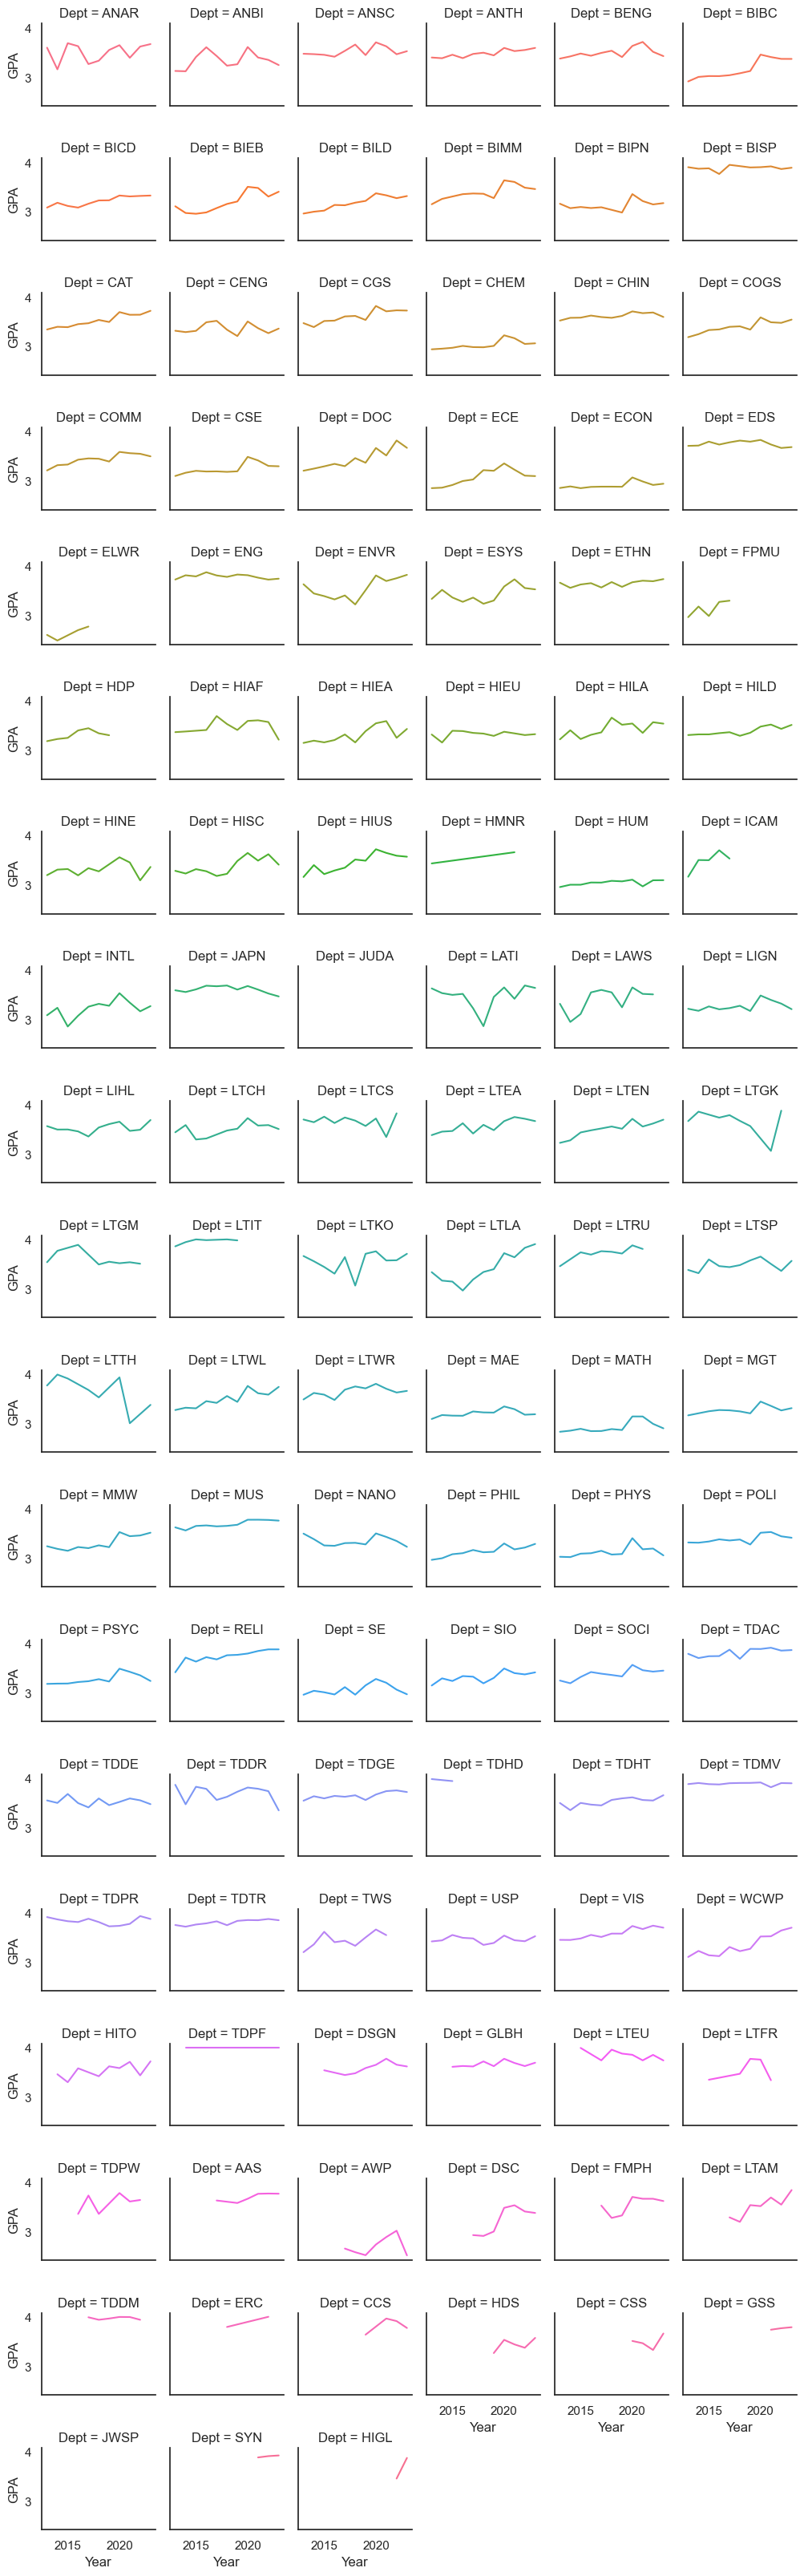

In [37]:
#creating mean by year df
mean_by_dept = capes.get(['Year','Dept','GPA']).groupby(['Year', 'Dept']).mean().reset_index()
mean_by_dept_13 = mean_by_dept[mean_by_dept.Year >= 2013]

sns.set_theme(style="white")

#creating facet grid (blank grid for every department with the axes)
img_facet = sns.FacetGrid(mean_by_dept_13, col="Dept", hue="Dept", col_wrap=6, height=1.7)

#to plot the GPA for every department in their respective grids
img_facet.map(plt.plot, "Year", "GPA")


Code reference to create image_facet from the website: https://seaborn.pydata.org/examples/many_facets.html
The facet plot roughly indicates a spike in the GPA around 2020 for majority of the departments.

## EDA cont. : Statistical Testing

In [38]:
import scipy.stats as stats
import statsmodels.api as sm

In [39]:
df = capes_sub_wo_sum
df

,Quarter,Dept,Division,Year,GPA,Dept Name,during_pandemic,during_chatgpt,during_TA_Strike
2208,WI13,WCWP,LD,2013.0,3.125000,Warren College Writing Program,False,False,False
2209,WI13,VIS,LD,2013.0,3.542000,Visual Arts,False,False,False
2210,WI13,VIS,UD,2013.0,3.444286,Visual Arts,False,False,False
2211,WI13,USP,LD,2013.0,3.390000,Urban Studies and Planning,False,False,False
2212,WI13,USP,UD,2013.0,3.570000,Urban Studies and Planning,False,False,False
...,...,...,...,...,...,...,...,...,...
7355,SP23,ANSC,UD,2023.0,3.548889,Anthro Sociocultural Anthropology,True,True,False
7356,SP23,ANBI,UD,2023.0,2.996667,Anthropology Biological Anthropology,True,True,False
7357,SP23,ANAR,UD,2023.0,3.535000,Anthropological Archaeology,True,True,False
7358,SP23,AAS,UD,2023.0,3.920000,African American Studies,True,True,False


### Chi-square testing
Initially opted for Chi-Square until we realized that Year was not numeric but rather categorical which resulted in a rather high P-value

In [40]:
correlation_coefficient = df['Year'].corr(df['GPA'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")

Pearson Correlation Coefficient: 0.24309645696067197


### One way ANOVA
Due to this realization that year was categorical, a one way ANOVA was selected as the method of statistical testing performed on both 'Year' and 'Quarter' as independent variables for dependent variable 'GPA'

When performing ANOVA on the GPA by Year (ind), the data suggested very compelling evidence to reject the null hypothesis with a F stat of ~35.3 and a p-val of ~1.065e^-66

Further, a similar result came when performing ANOVA testing on GPA by Quarter (ind) , where the data also suggested compelling evidence to reject the null hypothesis with a F stat of ~14.25 and a p-val of ~8.52e^-70

Due to the extremeness of results towards rejecting the null, this constitutes further investigation into the breakdown of factors contributing to such a strong difference

Recall that: \
**F Statistic**: Compares variability between group means to variability within groups, higher F values suggest significant differences between groups or regression\
**p Value**: likelihood of getting the results or more extreme (lower = more evidentce to reject the null)

In [41]:
#one way ANOVA for Year
dep = 'GPA'
ind = 'Year'
grouped_data = {group: df[df[ind] == group][dep] for group in df[ind].unique()}
f_statistic, p_value = stats.f_oneway(*grouped_data.values())
print(f"One-way ANOVA F-Statistic: {f_statistic}")
print(f"P-value: {p_value}")

One-way ANOVA F-Statistic: 35.305303736667675
P-value: 1.0652597058107511e-66


In [44]:
#one way ANOVA for Quarter
dep = 'GPA'
ind = 'Quarter'
grouped_data = {group: df[df[ind] == group][dep] for group in df[ind].unique()}
f_statistic, p_value = stats.f_oneway(*grouped_data.values())
print(f"One-way ANOVA F-Statistic: {f_statistic}")
print(f"P-value: {p_value}")

One-way ANOVA F-Statistic: 14.248988149143443
P-value: 8.520436886059617e-70


In [56]:
#Sample to check if we can ANOVA per department, PLEASE REMOVE BEFORE SUBMISSION
df1 = df[df.Dept == 'VIS']
grouped_data1 = {group: df1[df1[ind] == group][dep] for group in df1[ind].unique()}
f_statistic1, p_value1 = stats.f_oneway(*grouped_data1.values())
print(f"One-way ANOVA F-Statistic: {f_statistic1}")
print(f"P-value: {p_value1}")

One-way ANOVA F-Statistic: 5.559942777975505
P-value: 2.747746352881152e-06


### Linear Regression (OLS)

Due to the extremeness of the result, we have also elected to perform time series linear regression analysis to further guage the direction of this relationship. To do this, we investigate the coefficient, which in this case was .0241, indicating a postive relationship of GPA increase across years further validated by a low standard error of .002 and high t-statistic of 15.805 across 3979 observations.

This said, however, there are limitations as our dataset , despite ~3k observations, was not able to observe by quarter suggesting the need for further variable encoding. 

In [51]:
df_linreg = df.get(['Year','GPA'])
df_linreg.astype({'Year':'int','GPA':'float'})
df_lr_ind = df_linreg.Year
df_lr_ind = sm.add_constant(df_lr_ind)

x = df_linreg.Year
y = df_linreg.GPA
train_size = int(len(df_linreg)*.8)
train_x, test_x = x[1:train_size], x[train_size:]
train_y, test_y = y[1:train_size], y[train_size:]
model = sm.OLS(df_linreg['GPA'], df_lr_ind)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     249.8
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           1.29e-54
Time:                        17:25:25   Log-Likelihood:                -782.11
No. Observations:                3979   AIC:                             1568.
Df Residuals:                    3977   BIC:                             1581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -45.1458      3.073    -14.692      0.000     -51.170     -39.121
Year           0.0241      0.002     15.805      0.000       0.021       0.027
==============================================================================
Omnibus:                       50.064   Durbin-Watson:                   1.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.926
Skew:                          -0.220   Prob(JB):                     1.06e-10
Kurtosis:                       2.712   Cond. No.                     1.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


Our statistical analysis leads us to believe that we have evidence to support our hypothesis. In our next steps, we will continue to wrangle and test to further narrow down potential trends and causes for the variability in our data.

# Ethics & Privacy


In our research project analyzing UCSD student GPAs and related factors, we are committed to conducting a fair and unbiased study that prioritizes data privacy and anonymization of sensitive information. Respecting data privacy is of utmost importance to us. We will take appropriate steps to anonymize sensitive information and ensure that only authorized individuals have access to the data. Regular maintenance will be carried out to safeguard the integrity and security of the data throughout the research process. It is important to note that the UCSD CAPEs dataset used was scraped by a third party, and we rely on the accuracy and integrity of their data for our analysis. We will transparently report methodologies, assumptions, and limitations to address biases, striving for fairness and accountability. Our goal is to responsibly present findings without sensationalism, ensuring accuracy and ethical dissemination of results. By upholding rigorous ethical standards, we aim to contribute responsibly to the academic community and maintain trust in our research.

Overall, our research seeks to provide valuable insights without causing harm or reinforcing preconceived notions. While acknowledging the reliance on third-party scraped data, we remain dedicated to conducting an ethical study that upholds research integrity, promotes transparency, and respects data privacy.


# Conclusion & Discussion

In conclusion, this research project explored the relationship between UCSD students' grade point averages (GPAs) in upper and lower division courses from 2007 to 2022 and the influence of three key factors: the COVID-19 pandemic, the 2022 UCSD Academic Worker Strike, and the emergence of ChatGPT. Our analysis revealed a strong correlation between GPA changes and these factors, shedding light on the potential drivers of academic performance during the study period.

The impact of the COVID-19 pandemic on education was evident, with disruptions to traditional learning environments and a shift to remote instruction likely contributing to fluctuations in student GPAs. The 2022 UCSD Academic Worker Strike also played a role, potentially affecting academic support and resources available to students, which may have influenced GPA trends during that specific period. Additionally, the influence of ChatGPT, a sophisticated language model, on students' study habits and academic performance could be seen as a contributing factor to GPA variations over time. However, it is crucial to recognize the limitations of this study.


### Limitations


The research project faces several limitations that need to be considered when interpreting its findings. Firstly, the time series linear regression analysis used to gauge the relationship between GPA and years is constrained by the frequency of data collection. Despite having around 3,000 observations, the dataset lacks quarterly granularity, potentially hindering the identification of short-term fluctuations and seasonality in the data. To address this limitation, further variable encoding may be necessary, incorporating additional time-related variables to capture temporal patterns more comprehensively.

Secondly, the study encounters challenges in establishing direct causes of GPA increases. While the research identifies potential factors such as the pandemic's impact, the rise of ChatGPT, and a TA strike, the analysis cannot definitively establish causation. Instead, it infers these factors might play significant roles in influencing GPA trends. Causal relationships would require more rigorous experimentation and control, which may not be feasible with the existing dataset.

Lastly, the project's reliance on a single dataset scraped by a third party introduces concerns about data accuracy and methodology integrity. The researchers must acknowledge potential biases or errors in the data collection process, as they do not have direct control over its accuracy. It is essential to exercise caution when drawing conclusions from the analysis, as the reliability of the findings hinges on the credibility of the scraped data and the methodology employed.

### Next Steps

While this research offers valuable insights, several areas warrant further investigation to enhance our understanding of GPA changes and the factors influencing them. First, future studies could employ a more diverse dataset, including data from multiple institutions or universities, to ascertain the generalizability of our findings beyond UCSD. Additionally, conducting experimental studies to explore causal relationships between the identified factors and GPA fluctuations would strengthen the validity of our conclusions.

Furthermore, examining additional variables that could have contributed to GPA changes, such as student demographics, socioeconomic backgrounds, and individual course characteristics, could provide a more comprehensive understanding of the complexities involved. Moreover, implementing qualitative research methods, such as interviews or surveys, would allow for a deeper exploration of students' experiences and perceptions concerning the identified factors.

Addressing the limitations mentioned earlier, such as data accuracy and the lack of quarterly observations, is essential to enhance the robustness of future research in this domain. Collaborating with official university data sources or directly collecting data from UCSD would improve the accuracy and integrity of the research. By addressing these next steps and limitations, researchers can further elucidate the factors influencing GPA changes, contributing to the ongoing discourse on academic performance in evolving educational contexts.